## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
import warnings
warnings.filterwarnings('ignore')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [64]:
#loading and storing the data in the dataframe
df = pd.read_csv('Documents/AB test results/ab_data.csv')
#displaying the first few rows of the dataframe
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [65]:
#looking in the number of rows in the dataset
df.shape[0]

294478

there are 294478 rows in our dataset

c. The number of unique users in the dataset.

In [66]:
#looking at the number of unique users in the dataset
df["user_id"].nunique()

290584

we have a total of 290584 unique user ids in our dataset .

d. The proportion of users converted.

In [67]:
#calculating the proportion of users converted
len(df.query("converted == 1"))/df.shape[0]


0.11965919355605512

the proportion of users converted is approximately 0.12 .

e. The number of times the `new_page` and `treatment` don't line up.

to know The number of times the new_page and treatment don't line up. , we must calculate the occurences of the combinations of new_page and control , and treatment and old_page.

In [68]:
#calculating the number of times new_page and treatment don't line up
#querying the dataset by the mentioned combinations in the markdown cell above
len(df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page' )"))


3893

f. Do any of the rows have missing values?

In [69]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

as seen in the cell above , there are no missing values in all columns of our dataset .

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

we will keep the rows where treatment is aligned with new_page and control is aligned with old_page and store the new dataframe in df2 , the other rows will be dropped.

In [70]:
#creating a new dataset
df.to_csv('ab_data_new.csv', index=False)
#storing the dataset in df2
df2=pd.read_csv('Documents/AB test results/ab_data_new.csv')


In [71]:
df2=df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page' )")

In [72]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [73]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [74]:
#displaying the duplicated user id
df2[df2["user_id"].duplicated (keep= False )== True].head(1).user_id.to_string(index=False)

' 773192'

773192 is the duplicated user id

c. What is the row information for the repeat **user_id**? 

In [75]:
#displaying the row information for the duplicated user id
df2[df2["user_id"].duplicated (keep= False )== True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [76]:
#removing one of the rows 
df2.drop_duplicates('user_id' , inplace=True)

In [77]:
df2["user_id"].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [78]:
len(df.query("converted == 1"))/df.shape[0]

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [79]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [80]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [81]:
len(df2[df2['landing_page']=='new_page'])/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

 based on the results of the probability calculations made , **there isn't enough evidence that the new treatment page leads to more conversions , as both probabilities of converted users for the old and new pages are practically the same of 12% each**, we hereby can't make assumptions or gain insight from probability calculations alone on whether the new page leads to more conversions , more needs to be done to answer our question.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} >= p_{new}$$   


$$H_1: p_{new} > p_{old}$$

our null hypothesis is that the old page is equal to or better than the new page in generating conversions .
our alternative hypothesis is that the new page is better than the old page .

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [82]:
#calculating the convert rate for p_new under the null
p_new=len(df.query("converted == 1"))/df.shape[0]
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [83]:
#calculating the convert rate for p_old under the null
p_old=len(df.query("converted == 1"))/df.shape[0]
p_old

0.11965919355605512

c. What is $n_{new}$?

In [84]:
#calculating the size of the sample where landing page is new page
n_new=df2.query('landing_page=="new_page"').shape[0]

d. What is $n_{old}$?

In [85]:
#calculating the size of the sample where landing page is old page
n_old=df2.query('landing_page=="old_page"').shape[0]


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [86]:
new_page_converted=np.random.choice([0, 1],n_new , p=[p_new, 1-p_new ])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [87]:
old_page_converted=np.random.choice([0, 1], n_old , p=[p_old, 1-p_old ])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [88]:
#calculating p_new-p_old for our simulated values
new_page_converted.mean() - old_page_converted.mean()

-0.0003834636729972418

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [89]:
#simulating 10000 p_new - p_old values
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.choice([0, 1], n_new, p=[p_new, 1-p_new ])
    old_page_converted=np.random.choice([0, 1], n_old , p=[p_old, 1-p_old ])
#appending the values for each iteration
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
#converting p_diffs to a numpy array
p_diffs=np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

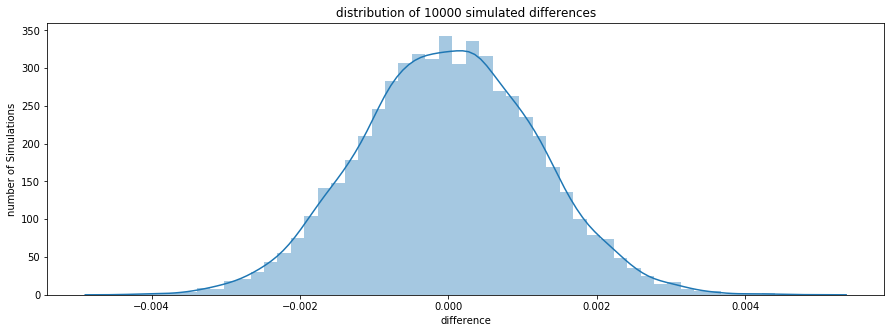

In [90]:
plt.figure(figsize=(15,5))
sns.distplot(p_diffs);
plt.ylabel('number of Simulations')
plt.xlabel('difference')
plt.title('distribution of 10000 simulated differences');

In [91]:
#calculating the actual difference in ab_data.csv
old_page_converted = df.query('group =="control"').converted.mean()
new_page_converted = df.query('group =="treatment"').converted.mean()
actual_diff = new_page_converted - old_page_converted

the actual difference highlighted in yellow line = -0.0014795997940775518


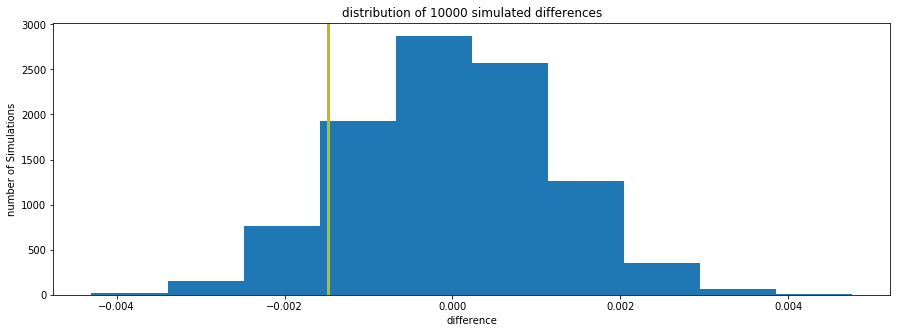

In [92]:
plt.figure(figsize=(15,5))
plt.hist(p_diffs);
plt.axvline(actual_diff,c='y',linewidth = 3);
plt.ylabel('number of Simulations')
plt.xlabel('difference')
plt.title('distribution of 10000 simulated differences');
print("the actual difference highlighted in yellow line =" , actual_diff)


based on the histogram above , we can predict that the proportion of p_diffs that is greater than the actual difference is large enough , and while we'll do the calculations in the cell afterwards to verify , we can obviously see here that most of our statistic falls beyond the actual difference line highlighted in yellow. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [93]:
#calculating the proportion of p_diffs that's greater than the actual difference
(p_diffs > actual_diff).mean()

0.8926

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In scientific studies , this value is called the ___P-value___ which is by definition the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true , in our case , the P-value , equals to 0.89 , is large enough to suggest that our data more likely came from our null hypothesis , therefore we fail to reject the null hypothesis that indicates that the old page is equal to or better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [94]:
import statsmodels.api as sm
#calculating the number of conversions for each page
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
#calculating the number of rows associated with each page
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]



m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [95]:
z_score, p_value =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new] ,alternative='smaller')
print ("the z score is",z_score)
print("the p_value is",p_value)

the z score is 1.3109241984234394
the p_value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the z-score and p-value computed in the previous question agree with the findings in parts j and k , by definition , a z-score describes a value's relationship to the mean of a group of values , it is measured in terms of standard deviations from the mean.In order to reject the null hypothesis, we must make a subjective judgment regarding the degree of risk we are willing to accept for being wrong. This degree of risk is often given in terms of critical values and/or confidence levels. with our Type I error rate of 5% and a 95% confidence level , the critical z-score values are -1.96 and +1.96 standard deviations , If our z-score is between -1.96 and +1.96, we cannot reject our null hypothesis , in our case , the z-score equals 1.31 , less than 1.96 , our p-value , on the other hand is 0.90 which is so close to the p-value calculated in part j and is greater than 0.05 , we can hereby affirm that we fail to reject the null hypothesis that states that the old page performs equally or better than the new one .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should be performing **logistic regressions** as the values are either 0 or 1 , conversion or no conversion , two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [96]:
#creating a column for the intercept
df2["intercept"]=1
#creating dummy varibles for which page each user received
df2[['control' , 'ab_page']]= pd.get_dummies(df2['group'])
#dropping control column as we need only one dummy variable column
df2 = df2.drop('control', axis = 1)
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [97]:
#importing the regression model
reg_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=reg_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:31:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

the p-value associated with ab_page is 0.19 , significantly lower than the p-value calculated in part II , this can be caused by the change in null and alternative hypotheses , in part II the hypotheses follow a one-tailed test where :
$$H_0: p_{old} >= p_{new}$$  
$$H_1: p_{new} > p_{old}$$

meanwhile in our case , and in logistic regression , the hypotheses test shape is two-tailed as the following :

$$H_0: p_{old} = p_{new}$$  
$$H_1: p_{new} != p_{old}$$



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font size =3.5>
adding new variables in our regression model helps us identify other factors that may affet conversions , which is reasonable , but it holds its fair share of disadvantages , <font color = green> such as multicollinearity and Simpson's paradox in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [99]:
countries_df = pd.read_csv('Documents/AB test results/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [100]:
#checking for unique values in dataset
df_new["country"].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

there are three countries in our dataset , so we will need 2 dummy variable columns

In [101]:
#Create the necessary dummy variables
df_new[['UK', 'US' , 'CA']] = pd.get_dummies(df_new['country'])[['UK','US' ,'CA']]
#keeping the UK and US columns
df_new = df_new.drop('CA', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [102]:
#importing the regression model
new_reg_model=sm.Logit(df_new['converted'],df_new[['intercept','US' ,'UK']])
results=new_reg_model.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [103]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:31:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

based on regression analysis of country effect alone on conversions , we can see that the p-values for the UK and US are both above 0.05 of respectively 0.074 and 1.129 ,which is insignifcant to say that there is a relationship between conversions and country ,therefore country doesn't affect conversions.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [104]:
#creating interaction between page and country
df_new["UK_page"]=df_new["UK"]*df_new["ab_page"]
df_new["US_page"]=df_new["US"]*df_new["ab_page"]
#importing the regression model
model=sm.Logit(df_new['converted'],df_new[['intercept','US_page' ,'UK_page' ]])
#fitting the regression model
results=model.fit()


Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [105]:
#a result summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:               1.082e-05
Time:                        13:31:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

the combination of both page and country doesn't seem to have any significant impact on conversion , as the p-values for US_page and UK_page are respectively 0.248 and 0.532 , always greater than 0.05 suggesting  no statistical evidence of effect on conversion.

<a id='conclusions'></a>
## Conclusions





<font size =3.5>
    
    
the A/B test and the regression approach results both fail to reject the null hypothesis , we therefore recommend to keep the old page .